In this notebook, you will learn Logistic Regression, and then, you'll create a model for a telecommunication company, to predict when its customers will leave for a competitor, so that they can take some action to retain the customers.


<a id="ref1"></a>
## What is different between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the **most probable class** for that data point. For this, we use **Logistic Regression**.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
As you know, __Linear regression__ finds a function that relates a continuous dependent variable, _y_, to some predictors (independent variables _x1_, _x2_, etc.). For example, Simple linear regression assumes a function of the form:
<br><br>
$$
y = 𝜃0 + 𝜃1 * x1 + 𝜃2 * x2 +...
$$
<br>
and finds the values of parameters _θ0_, _θ1_, _𝜃2_, etc, where the term _𝜃0_ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_θ(𝑥) = 𝜃^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, _y_, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_θ(𝑥) = 𝜎({θ^TX}) =  \frac {e^{(θ0 + θ1 * x1 + θ2 * x2 +...)}}{1 + e^{(θ0 + θ1 * x1 + θ2 * x2 +...)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = 𝜎({θ^TX}) = \frac{e^{θ^TX}}{1+e^{θ^TX}} 
$$

In this equation, ${θ^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $𝜎(θ^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width = "400" align = "center">


The objective of __Logistic Regression__ algorithm, is to find the best parameters θ, for ℎ_θ(𝑥) = 𝜎({θ^TX}), in such a way that the model best predicts the class of each case.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn.preprocessing import StandardScaler
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('ChurnData.csv')
raw_data

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


* Change the dependent variable column to a integer type, currently it is float type

In [16]:
raw_data[raw_data.columns[-1]] = raw_data[raw_data.columns[-1]].astype('int')
raw_data

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1


In [20]:
X = raw_data.iloc[:,:-1].values
X

array([[11.   , 33.   ,  7.   , ...,  3.033,  4.913,  4.   ],
       [33.   , 33.   , 12.   , ...,  3.24 ,  3.497,  1.   ],
       [23.   , 30.   ,  9.   , ...,  3.24 ,  3.401,  3.   ],
       ...,
       [ 6.   , 32.   , 10.   , ...,  3.168,  3.85 ,  3.   ],
       [24.   , 30.   ,  0.   , ...,  3.866,  3.219,  4.   ],
       [61.   , 50.   , 16.   , ...,  3.24 ,  5.247,  2.   ]])

In [19]:
y = raw_data.iloc[:,-1].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

### Scaling the data

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.13518441, -0.62595491, -0.4588971 , ..., -0.69987184,
         1.28150384,  1.41630855],
       [-0.11604313, -0.62595491,  0.03454064, ...,  0.03858151,
        -0.60481397, -1.36987221],
       [-0.57928917, -0.85594447, -0.261522  , ...,  0.03858151,
        -0.73269992,  0.48758163],
       ...,
       [-1.36680743, -0.7026181 , -0.16283445, ..., -0.21827183,
        -0.13456666,  0.48758163],
       [-0.53296457, -0.85594447, -1.14970993, ...,  2.27177859,
        -0.97515038,  1.41630855],
       [ 1.18104577,  0.67731925,  0.42929083, ...,  0.03858151,
         1.72644039, -0.44114529]])

### Splitting training and testing data

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=30)

print("Training data: ", X_train.shape, y_train.shape)
print()
print("Testing data: ", X_test.shape, y_test.shape)

Training data:  (160, 27) (160,)

Testing data:  (40, 27) (40,)


### Build the model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

logreg = LogisticRegression(C=0.01, solver='liblinear')
logreg = logreg.fit(X_train, y_train)
logreg

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
logreg_prediction = logreg.predict(X_test)
logreg_prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [29]:
print("Accuracy of logistic regression is: ", accuracy_score(y_test, logreg_prediction))

Accuracy of logistic regression is:  0.7


In [32]:
logreg_probability = logreg.predict_proba(X_test)
logreg_probability

array([[0.51048332, 0.48951668],
       [0.53380676, 0.46619324],
       [0.7466808 , 0.2533192 ],
       [0.63665662, 0.36334338],
       [0.72590235, 0.27409765],
       [0.46057082, 0.53942918],
       [0.74413233, 0.25586767],
       [0.57369132, 0.42630868],
       [0.54348528, 0.45651472],
       [0.53914667, 0.46085333],
       [0.59817926, 0.40182074],
       [0.55694318, 0.44305682],
       [0.39537792, 0.60462208],
       [0.75488009, 0.24511991],
       [0.51941631, 0.48058369],
       [0.6966735 , 0.3033265 ],
       [0.5838877 , 0.4161123 ],
       [0.59211569, 0.40788431],
       [0.43084859, 0.56915141],
       [0.74303877, 0.25696123],
       [0.44455388, 0.55544612],
       [0.61080019, 0.38919981],
       [0.72419982, 0.27580018],
       [0.73528011, 0.26471989],
       [0.64608864, 0.35391136],
       [0.63914069, 0.36085931],
       [0.68102528, 0.31897472],
       [0.36827911, 0.63172089],
       [0.39540057, 0.60459943],
       [0.72971373, 0.27028627],
       [0.

### Evaluation

##### Jaccard Index

Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [33]:
from sklearn.metrics import jaccard_similarity_score

jaccard_similarity_score(y_test, logreg_prediction)

0.7

#### Confusion matrix

In [36]:
from sklearn.metrics import classification_report
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, logreg_prediction, labels=[1,0]))

[[ 6  6]
 [ 6 22]]


Confusion matrix, without normalization
[[ 6  6]
 [ 6 22]]


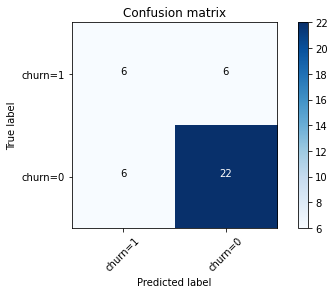

In [37]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, logreg_prediction, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [39]:
print (classification_report(y_test, logreg_prediction))


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.50      0.50      0.50        12

    accuracy                           0.70        40
   macro avg       0.64      0.64      0.64        40
weighted avg       0.70      0.70      0.70        40



Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, we can tell the average accuracy for this classifier is the average of the f1-score for both labels, which is 0.70 in our case.

### log loss
Now, lets try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 


In [40]:
from sklearn.metrics import log_loss
log_loss(y_test, logreg_probability)

0.5613430846118639